# Project Name

## Goal:
- Objective 1
- Objective 2

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import wrangle as w
import explore as e
# import model as m
# import evaluate as ev

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import unicodedata
import nltk
from wordcloud import WordCloud
import os
import json

# import for exploring
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

# import for model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Acquire
- Aquire a corpus of GitHub repository README files via GitHub API. 
* Our data comes from the top 100 most-starred repositories on GitHub current as of 27 Jun 2023.
- It contained 119 rows and 3 columns before cleaning
- Each row represents a repository.
- Each column represents the features of repository: name, read.me text, and language type

# Prepare
- Clean text by making all text lowercase
- Removed special characters
- Tokenizing the words into discrete units
- lemmatizing them to get word roots
- Checked for nulls dropped the 9 nulls that didn't contain languages
- Checked that column data types were appropriate
- Split data into train, validate, and test (60/20/20), stratifying on language.

# Data Dictionary

| Feature Name | Data Type | Description | Example |
| ----- | ----- | ----- | ----- |
| repo | object | Name of Repository | 'huggingface/transformers' |
| language | object | Predominant coding language of Repository | 'Python' |
| readme_contents | object | Contents of Repository's README file | 'Transformers provides thousands of pretrained...' |
| cleaned_readme_contents | object | Cleaned version  of contents of Repository's README file | 'transformers provides thousands pretrained...' |

In [20]:
## acquireing and preparing data for exploration
df = a.get_data_json()

df = w.clean_df(df)

In [3]:
## splitting data in to train, validate, and test
train, validate, test = w.split_data(df)

# A brief look at the data

In [4]:
train.head()

,repo,language,readme_contents,lemmatized,readme_length
70,inkling/Subliminal,Objective-C,"<p align=""center"" >\n <img src=""http://inklin...",p aligncenter img srchttpinklinggithubiosublim...,11215
59,microsoftarchive/android-sliding-layer-lib,Java,6Wunderkinder SlidingLayer for Android\n======...,6wunderkinder slidinglayer android repository ...,4266
92,jamesob/tinychain,Python,"# ⛼ tinychain\n\n*Putting the rough in ""[roug...",tinychain putting rough rough consensushttpsto...,8333
104,Cleveroad/CRNetworkButton,Swift,# CRNetworkButton [![Awesome](https://cdn.rawg...,crnetworkbutton awesomehttpscdnrawgitcomsindre...,5268
97,zhangxinxu/mobilebone,JavaScript,"mobilebone.js\n=============\n\n<img src=""http...",mobilebonejs img srchttpswwwzhangxinxucomgithu...,5908


## A summary of the data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 70 to 75
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             66 non-null     object
 1   language         66 non-null     object
 2   readme_contents  66 non-null     object
 3   lemmatized       66 non-null     object
 4   readme_length    66 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [6]:
train.describe()

,readme_length
count,66.000000
mean,9124.742424
std,25242.379029
min,251.000000
25%,2835.000000
50%,4877.500000
75%,6918.250000
max,206311.000000


# Explore

## Question 1 What are the most common words in READMEs?

In [7]:
# split the words individually up and lemmatize them                                                                                                                                                                                                                                                                                                            
git_lem_words =" ".join(train.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

# create df of freq words
word_counts = pd.concat([lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["lemmatize"]

# create df of most common words
word_counts.head(10)

,lemmatize
rust,451
build,277
use,215
library,204
file,147
user,143
using,138
install,138
code,137
example,131


* The top five most common words are: rust, build, use, library, and file

## Question 1 Are there any words that uniquely identify a programming language?

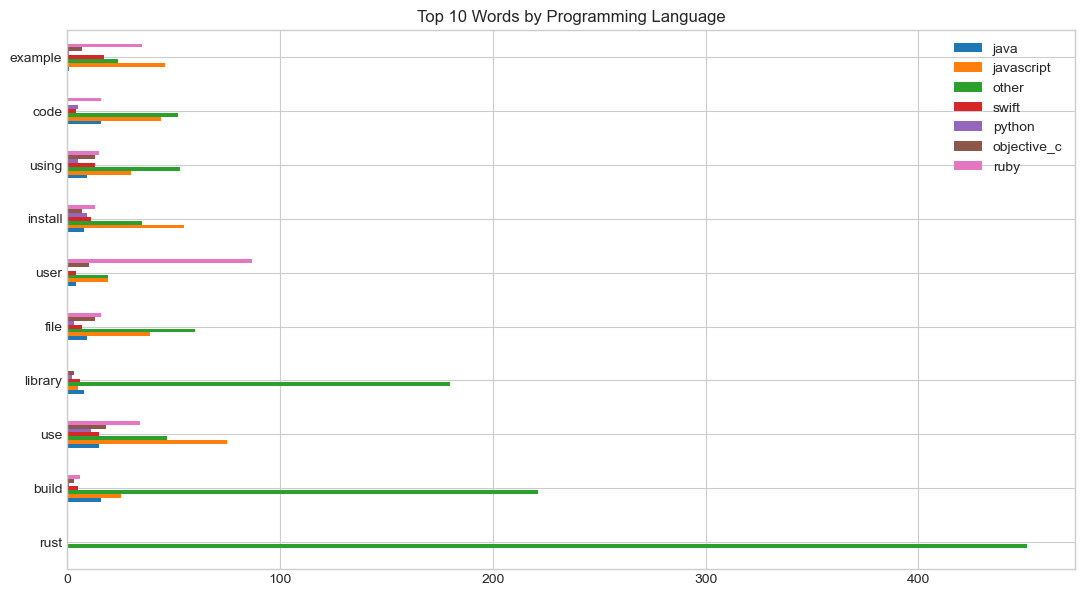

In [8]:
# top 10 word visualizes
e.get_word_viz(train)

### Summarize
* `Rust` was the most common for the other languages,
* `Use` was more profound in the JavaScript Langauge
* `User` was used more in Ruby 

## Question 2 (e.g. Is feature_x associated with target?)

In [9]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [10]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 3 

In [11]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 4 Are there bigrams or n-grams that can uniquely identify a programming language?

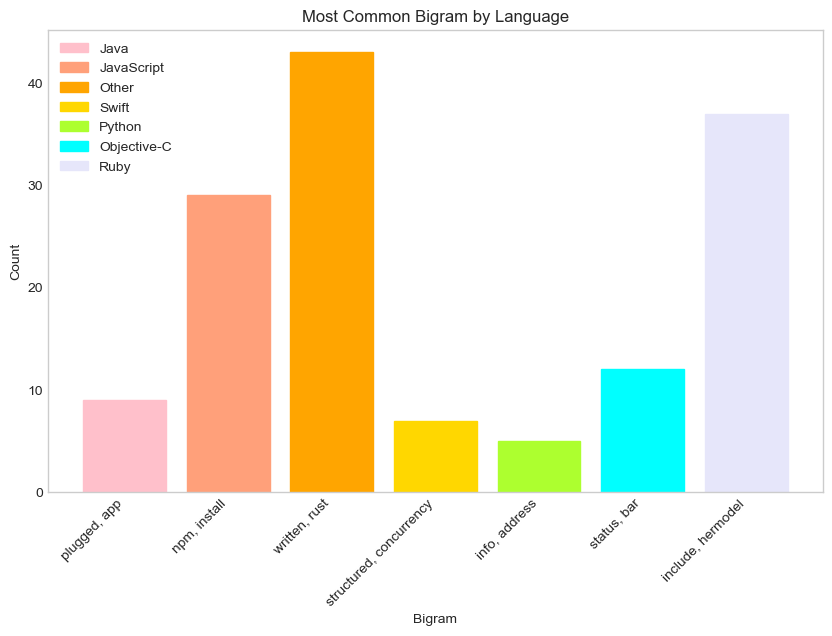

In [14]:
# visual of most common bigram by language
e.plot_bigrams_graph()

### Summarize
* `written, rust` was more associated to others
* `include hermodel` was more associated to Ruby
* `npm install` and was more associate to npm install - npm is a package manager for the JavaScript programming language

## Exploration Summary
* Plain English bullets as required

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


### (As Required) Features I am moving to modeling with

### (As Required) Features I am not moving to modeling with

# Modeling
* Evaluation Metrics: We will use accuracy as our evaluation metrics
    * Baseline is 0.27
* I will evaluate 3 different model types and various hyperparameter configurations
    * The four model types are DecisionTree, Random Forest, KNN
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [21]:
## prep data for modeling
# get X y splits for modeling
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = e.split_data_xy(train, validate, test)

# create baseline 
baseline_accuracy = (train.language == "JavaScript").mean()
round(baseline_accuracy, 2)

train -> (66, 5)
validate -> (22, 5)
test -> (22, 5)


0.27

In [22]:
# create bag of words
cv = CountVectorizer()
x_bow = cv.fit_transform(x_train)
x_validate_bow = cv.transform(x_validate)
x_test_bow = cv.transform(x_test)

## Model Name: DecisionTreeClassifier

In [23]:
#build my model
tree = DecisionTreeClassifier(max_depth=7, random_state=123)
tree.fit(x_bow, y_train)
tree.score(x_bow, y_train)

# get model results
print(f" Train Score: {tree.score(x_bow, y_train)}, Validation Score: {tree.score(x_validate_bow, y_validate)}")

 Train Score: 0.8939393939393939, Validation Score: 0.5


* model: DecisionTreeClassifier did beat baseline with approximately 23%

## Model: Random Forest

In [24]:
# get model results
#build my model
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=1, random_state=123)
rf.fit(x_bow, y_train)

# get model results
print(f" Train Score: {rf.score(x_bow, y_train)}, Validation Score: {rf.score(x_validate_bow, y_validate)}")

 Train Score: 0.9545454545454546, Validation Score: 0.3181818181818182


* model: Random Forest did beat baseline with approximately 4%

## Model: KNN

In [ ]:
# get model results
#build my model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_bow, y_train)

# get model results
print(f" Train Score: {knn.score(x_bow, y_train)}, Validation Score: {knn.score(x_validate_bow, y_validate)}")

* model: KNN did beat baseline with approximately 9%

## Comparing Models
* summarize the model performance
* DecisionTreeClassifier did beat baseline with approximately 23%
* Random Forest did beat baseline with approximately 4%
* KNN did beat baseline with approximately 9%
* I have chosen to move forward with the DecisionTree model on test

## Best Model Decision Tree on Test

In [ ]:
# get test results for final model
tree.score(x_test_bow, y_test)

## Modeling Summary
* The model outperformed the baseline by 37%

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets